In [80]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import random

In [81]:
import tensorflow as tf

In [82]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from scikeras.wrappers import KerasRegressor
from keras.optimizers import Adam

In [83]:
ne_train = pd.read_csv("ne_train.csv")
ne_test = pd.read_csv("ne_test_new.csv")

s_train = pd.read_csv("s_train.csv")
s_test = pd.read_csv("s_test.csv")

In [84]:
columns = ['date', 'covid_19_confirmed_cases']
ne_train = ne_train[columns]
ne_test = ne_test[columns]

s_train = s_train[columns]
s_test = s_test[columns]

### Sequencing Data for LSTM

In [54]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    
    return ds.batch(batch_size).prefetch(1)

In [85]:
window_size = 7 # windowing data by week
batch_size = 25
shuffle_buffer= 200

ne_train_windowed = windowed_dataset(ne_train['covid_19_confirmed_cases'],window_size, batch_size, shuffle_buffer)
ne_test_windowed = windowed_dataset(ne_test['covid_19_confirmed_cases'],window_size, batch_size, shuffle_buffer)

s_train_windowed = windowed_dataset(s_train['covid_19_confirmed_cases'],window_size, batch_size, shuffle_buffer)
s_test_windowed = windowed_dataset(s_test['covid_19_confirmed_cases'],window_size, batch_size, shuffle_buffer)

### Model Building - NE

In [60]:
 model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters = 25, kernel_size = 3, strides = 1, padding = "causal",
                      activation = "relu", input_shape = [None, 1]),
  tf.keras.layers.LSTM(25, return_sequences = True),
  tf.keras.layers.LSTM(25, return_sequences = True),
  tf.keras.layers.Dense(1)])

optimizer = tf.keras.optimizers.SGD(lr = 1e-7, momentum = 0.9)
model.compile(loss = tf.keras.losses.Huber(),optimizer = optimizer,metrics = ["mae"])

ne_lstm = model.fit(ne_train_windowed, epochs = 300)

Epoch 1/300
8/8 [==============================] - 4s 32ms/step - loss: 4851.1074 - mae: 4851.5332
Epoch 2/300
8/8 [==============================] - 0s 7ms/step - loss: 4849.5264 - mae: 4850.0049
Epoch 3/300
8/8 [==============================] - 0s 7ms/step - loss: 4847.1733 - mae: 4847.6704
Epoch 4/300
8/8 [==============================] - 0s 7ms/step - loss: 4842.8950 - mae: 4843.3926
Epoch 5/300
8/8 [==============================] - 0s 7ms/step - loss: 4835.9443 - mae: 4836.4341
Epoch 6/300
8/8 [==============================] - 0s 7ms/step - loss: 4827.1802 - mae: 4827.6655
Epoch 7/300
8/8 [==============================] - 0s 7ms/step - loss: 4816.8701 - mae: 4817.3613
Epoch 8/300
8/8 [==============================] - 0s 8ms/step - loss: 4806.4648 - mae: 4806.9580
Epoch 9/300
8/8 [==============================] - 0s 7ms/step - loss: 4796.1611 - mae: 4796.6567
Epoch 10/300
8/8 [==============================] - 0s 7ms/step - loss: 4792.9458 - mae: 4793.4409
Epoch 11/300
8/8 [

8/8 [==============================] - 0s 11ms/step - loss: 3525.3774 - mae: 3525.8159
Epoch 166/300
8/8 [==============================] - 0s 8ms/step - loss: 3523.2803 - mae: 3523.7197
Epoch 167/300
8/8 [==============================] - 0s 7ms/step - loss: 3520.9072 - mae: 3521.3604
Epoch 168/300
8/8 [==============================] - 0s 8ms/step - loss: 3518.7480 - mae: 3519.1948
Epoch 169/300
8/8 [==============================] - 0s 7ms/step - loss: 3516.2988 - mae: 3516.7449
Epoch 170/300
8/8 [==============================] - 0s 7ms/step - loss: 3514.1882 - mae: 3514.6321
Epoch 171/300
8/8 [==============================] - 0s 7ms/step - loss: 3511.7312 - mae: 3512.1716
Epoch 172/300
8/8 [==============================] - 0s 7ms/step - loss: 3509.4829 - mae: 3509.9224
Epoch 173/300
8/8 [==============================] - 0s 7ms/step - loss: 3507.5244 - mae: 3507.9651
Epoch 174/300
8/8 [==============================] - 0s 7ms/step - loss: 3505.2708 - mae: 3505.7131
Epoch 175/300

8/8 [==============================] - 0s 6ms/step - loss: 3431.6597 - mae: 3432.1184
Epoch 248/300
8/8 [==============================] - 0s 7ms/step - loss: 3431.2195 - mae: 3431.6619
Epoch 249/300
8/8 [==============================] - 0s 6ms/step - loss: 3430.8975 - mae: 3431.3533
Epoch 250/300
8/8 [==============================] - 0s 6ms/step - loss: 3430.3469 - mae: 3430.7888
Epoch 251/300
8/8 [==============================] - 0s 7ms/step - loss: 3429.9719 - mae: 3430.4138
Epoch 252/300
8/8 [==============================] - 0s 7ms/step - loss: 3429.5627 - mae: 3430.0093
Epoch 253/300
8/8 [==============================] - 0s 7ms/step - loss: 3428.9600 - mae: 3429.4026
Epoch 254/300
8/8 [==============================] - 0s 7ms/step - loss: 3428.5515 - mae: 3428.9988
Epoch 255/300
8/8 [==============================] - 0s 7ms/step - loss: 3428.0251 - mae: 3428.4873
Epoch 256/300
8/8 [==============================] - 0s 6ms/step - loss: 3427.7717 - mae: 3428.2229
Epoch 257/300


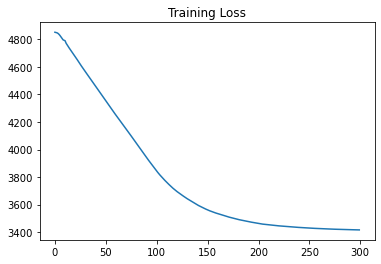

In [65]:
plt.plot(ne_lstm.history["loss"])
plt.title("Training Loss")
plt.show()

In [108]:
model = Sequential([LSTM(100, activation='relu', return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])),Dropout(0.2),
    LSTM(50, activation='relu', return_sequences = True),Dropout(0.2),
    LSTM(50, activation='relu'), Dropout(0.2),
    Dense(1)  
])

model.compile(loss = 'mean_absolute_error', metrics = ['mae'])

In [98]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 7, 100)            40800     
                                                                 
 dropout_13 (Dropout)        (None, 7, 100)            0         
                                                                 
 lstm_25 (LSTM)              (None, 7, 50)             30200     
                                                                 
 dropout_14 (Dropout)        (None, 7, 50)             0         
                                                                 
 lstm_26 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_15 (Dropout)        (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 1)               

In [99]:
pred = model.predict(ne_test_windowed)

2/2 [==============================] - 1s 216ms/step


In [100]:
mean_absolute_error(ne_test.covid_19_confirmed_cases[:41], pred)

2273.849261586259

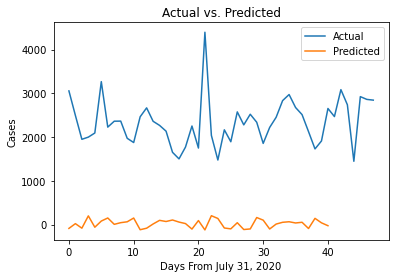

In [101]:
plt.plot(ne_test['covid_19_confirmed_cases'], label='Actual')
plt.plot(pred, label='Predicted')
plt.xlabel('Days From July 31, 2020')
plt.ylabel('Cases')
plt.title('Actual vs. Predicted')
plt.legend()

### Model - South

In [88]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters = 25, kernel_size = 3, strides = 1, padding = "causal",
                      activation = "relu", input_shape = [None, 1]),
  tf.keras.layers.LSTM(25, return_sequences=True),
  tf.keras.layers.LSTM(25, return_sequences=True),
  tf.keras.layers.Dense(1)])

optimizer = tf.keras.optimizers.SGD(lr = 1e-7, momentum = 0.9)
model.compile(loss = tf.keras.losses.Huber(),optimizer = optimizer,metrics = ["mae"])

s_lstm = model.fit(s_train_windowed, epochs = 300)

Epoch 1/300
6/6 [==============================] - 3s 14ms/step - loss: 9540.4258 - mae: 9540.9248
Epoch 2/300
6/6 [==============================] - 0s 9ms/step - loss: 9538.8975 - mae: 9539.3965
Epoch 3/300
6/6 [==============================] - 0s 8ms/step - loss: 9536.6650 - mae: 9537.1641
Epoch 4/300
6/6 [==============================] - 0s 7ms/step - loss: 9533.2148 - mae: 9533.7129
Epoch 5/300
6/6 [==============================] - 0s 8ms/step - loss: 9527.4658 - mae: 9527.9639
Epoch 6/300
6/6 [==============================] - 0s 8ms/step - loss: 9519.1455 - mae: 9519.6455
Epoch 7/300
6/6 [==============================] - 0s 7ms/step - loss: 9508.8984 - mae: 9509.3975
Epoch 8/300
6/6 [==============================] - 0s 8ms/step - loss: 9497.6787 - mae: 9498.1787
Epoch 9/300
6/6 [==============================] - 0s 8ms/step - loss: 9486.4502 - mae: 9486.9512
Epoch 10/300
6/6 [==============================] - 0s 8ms/step - loss: 9475.3740 - mae: 9475.8730
Epoch 11/300
6/6 [

6/6 [==============================] - 0s 8ms/step - loss: 7805.4141 - mae: 7805.9136
Epoch 166/300
6/6 [==============================] - 0s 7ms/step - loss: 7795.9399 - mae: 7796.4404
Epoch 167/300
6/6 [==============================] - 0s 7ms/step - loss: 7786.9199 - mae: 7787.4199
Epoch 168/300
6/6 [==============================] - 0s 6ms/step - loss: 7777.4229 - mae: 7777.9229
Epoch 169/300
6/6 [==============================] - 0s 6ms/step - loss: 7767.8726 - mae: 7768.3726
Epoch 170/300
6/6 [==============================] - 0s 7ms/step - loss: 7758.7588 - mae: 7759.2583
Epoch 171/300
6/6 [==============================] - 0s 6ms/step - loss: 7749.1562 - mae: 7749.6572
Epoch 172/300
6/6 [==============================] - 0s 6ms/step - loss: 7739.9663 - mae: 7740.4663
Epoch 173/300
6/6 [==============================] - 0s 7ms/step - loss: 7731.0347 - mae: 7731.5342
Epoch 174/300
6/6 [==============================] - 0s 7ms/step - loss: 7721.3472 - mae: 7721.8472
Epoch 175/300


6/6 [==============================] - 0s 7ms/step - loss: 7103.6938 - mae: 7104.1934
Epoch 248/300
6/6 [==============================] - 0s 8ms/step - loss: 7095.7090 - mae: 7096.2090
Epoch 249/300
6/6 [==============================] - 0s 7ms/step - loss: 7087.0767 - mae: 7087.5767
Epoch 250/300
6/6 [==============================] - 0s 7ms/step - loss: 7079.6719 - mae: 7080.1714
Epoch 251/300
6/6 [==============================] - 0s 7ms/step - loss: 7071.6787 - mae: 7072.1792
Epoch 252/300
6/6 [==============================] - 0s 7ms/step - loss: 7063.3735 - mae: 7063.8740
Epoch 253/300
6/6 [==============================] - 0s 8ms/step - loss: 7055.3926 - mae: 7055.8926
Epoch 254/300
6/6 [==============================] - 0s 8ms/step - loss: 7047.7563 - mae: 7048.2568
Epoch 255/300
6/6 [==============================] - 0s 8ms/step - loss: 7039.6689 - mae: 7040.1685
Epoch 256/300
6/6 [==============================] - 0s 8ms/step - loss: 7031.4849 - mae: 7031.9849
Epoch 257/300


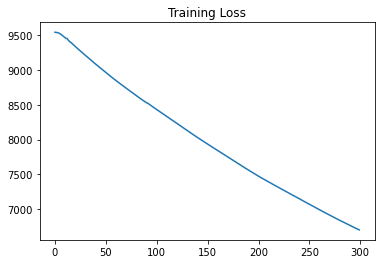

In [89]:
plt.plot(s_lstm.history["loss"])
plt.title("Training Loss")
plt.show()

In [102]:
model = Sequential([
    LSTM(100, activation='relu', return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    
    LSTM(50, activation='relu', return_sequences = True),
    Dropout(0.2),
    
    LSTM(50, activation='relu'),
    Dropout(0.2),
    
    Dense(1)  
])

model.compile(loss='mean_absolute_error', metrics=['mae'])

In [103]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 7, 100)            40800     
                                                                 
 dropout_16 (Dropout)        (None, 7, 100)            0         
                                                                 
 lstm_28 (LSTM)              (None, 7, 50)             30200     
                                                                 
 dropout_17 (Dropout)        (None, 7, 50)             0         
                                                                 
 lstm_29 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_18 (Dropout)        (None, 50)                0         
                                                                 
 dense_13 (Dense)            (None, 1)               

In [104]:
pred = model.predict(s_test_windowed)

2/2 [==============================] - 0s 41ms/step


In [105]:
mean_absolute_error(s_test.covid_19_confirmed_cases[:41], pred)

16509.14390898914

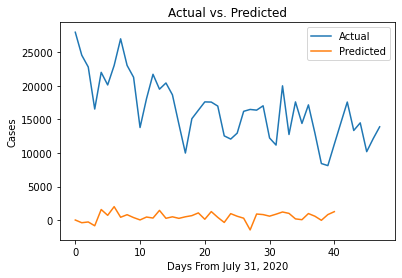

In [106]:
plt.plot(s_test['covid_19_confirmed_cases'], label='Actual')
plt.plot(pred, label='Predicted')
plt.xlabel('Days From July 31, 2020')
plt.ylabel('Cases')
plt.title('Actual vs. Predicted')
plt.legend()